In [74]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


In [75]:
def scatter_plot(ax, x_name, y_name, data):
    ax.scatter(data[x_name], data[y_name], s=5, c=data["smoker_numeric"])
    ax.set_xlabel(x_name)
    ax.set_ylabel(y_name)


def analizzaDataset(data, nomeFile, y_name):
    validCols = [data[d].dtype!="object" for d in data]
    cols_numeriche=data.columns[validCols]
    n=len(cols_numeriche)    
    fig, axs = plt.subplots(figsize=(8, 35), nrows=n, ncols=1)
    for i, col_1 in enumerate(cols_numeriche):
        scatter_plot(axs[i], col_1 , y_name, data)
    
    plt.savefig(nomeFile)
    plt.show()

In [76]:
data=pd.read_csv("./insurance.csv")
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [77]:
sex_labelencoder=LabelEncoder()
data["sex_numeric"]=sex_labelencoder.fit_transform(data["sex"])

smoker_labelencoder=LabelEncoder()
data["smoker_numeric"]=smoker_labelencoder.fit_transform(data["smoker"])

region_labelencoder=LabelEncoder()
data["region_numeric"]=region_labelencoder.fit_transform(data["region"])


In [89]:
sex_labelencoder.transform(["male", "female"])
#sex_labelencoder.classes_

array([1, 0])

In [79]:
smoker_labelencoder.transform(["yes", "no"])


array([1, 0])

In [80]:
for i, label in enumerate(region_labelencoder.classes_):
    print(f"{label} -> {i}")

northeast -> 0
northwest -> 1
southeast -> 2
southwest -> 3


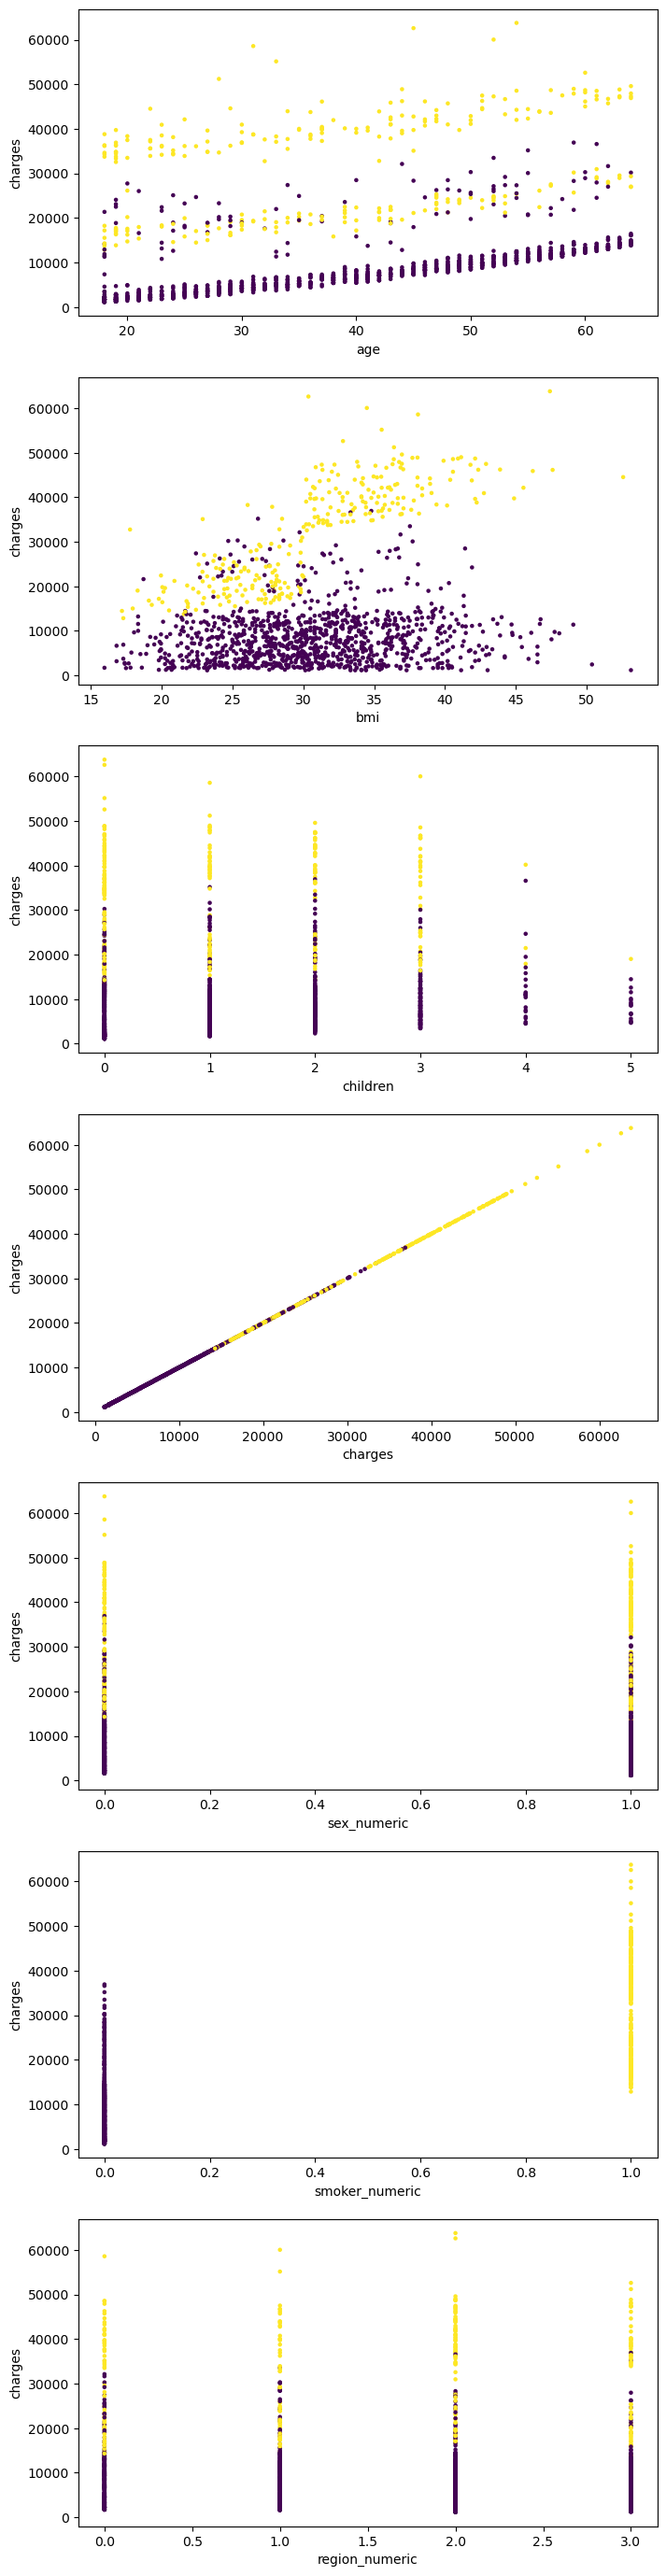

In [81]:
analizzaDataset(data, "insurance.pdf", "charges")

In [90]:
feature=["age","sex_numeric","bmi","children","smoker_numeric"]
output="charges"

X=data[feature].to_numpy()
y=data[output].to_numpy()

In [91]:
X_train, X_test, y_train, y_test = train_test_split (X, y, random_state=42, test_size=0.1)

In [92]:
regressor=LinearRegression()

In [93]:
regressor.fit(X_train, y_train)

LinearRegression()

In [94]:
regressor.score(X_train, y_train)

0.7482776178297046

In [105]:
feature=["age","sex_numeric","bmi","children","smoker_numeric","region_numeric"]
age=19
sex_numeric=0
bmi=27.9
children=0
smoker_numeric=0
sex='female'
smoker='no'

sex_numeric=sex_labelencoder.transform([sex])[0]
smoker_numeric=smoker_labelencoder.transform([smoker])[0]

person=np.array([[age,sex_numeric,bmi,children,smoker_numeric]])
regressor.predict(person)

array([1962.90082196])